In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 

In [2]:
raw_data = pd.read_excel('https://raw.githubusercontent.com/smeng0428/BUS9430/main/loan.xlsx')

In [3]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
raw_data.shape

(39717, 111)

In [5]:
raw_data.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term  int_rate  installment grade sub_grade  ...  \
0       36 months    0.1065       162.87     B        B2  ... 

In [6]:
## get the description for the features.

codebook = pd.read_excel('https://raw.githubusercontent.com/smeng0428/BUS9430/main/Data_Dictionary.xlsx', sheet_name='LoanStats')

In [7]:
## clean up the code book.the last two raws(115,116) are just footnotes.
codebook = codebook[:114].copy()

In [8]:
codebook = codebook.rename(columns = {'LoanStatNew': "Feature"})
codebook.head()

,Feature,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


## split the dataset to training/validation set

In [9]:
train_set, val_set = train_test_split(raw_data, train_size = 0.7, random_state = 9340)

In [10]:
## check for missing data
pd.set_option('display.float_format', lambda x: '%.5f' % x)
missing_ratios = raw_data.isna().sum() / raw_data.shape[0]
missing_ratios.sort_values(ascending = False)


total_il_high_credit_limit   1.00000
mo_sin_old_rev_tl_op         1.00000
bc_util                      1.00000
bc_open_to_buy               1.00000
avg_cur_bal                  1.00000
                               ...  
pub_rec                      0.00000
open_acc                     0.00000
inq_last_6mths               0.00000
earliest_cr_line             0.00000
id                           0.00000
Length: 111, dtype: float64

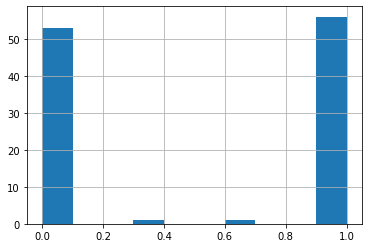

In [11]:
## significant part of the feature have nearly all missing values. These features does not provide much info.
## small portion of features have 30-70% missing values.
missing_ratios.hist()

In [12]:
## append the disctription of features to a df
unique_ns =[]
unique_values = []
na_percent = train_set.isna().sum()/train_set.shape[0]
for i in train_set.columns:
    unique_ns.append(len(train_set[i].unique()))
    unique_values.append(train_set[i].unique())

tmp = pd.DataFrame(list(zip(train_set.columns,unique_ns, unique_values, na_percent)), columns=['Feature', 'unique_counts', 'unique_values','na_percent'])    
data_dictionary = pd.merge(tmp, codebook, how='left', on = "Feature")
data_dictionary

,Feature,unique_counts,unique_values,na_percent,Description
0,id,27801,"[367694, 352163, 595744, 570024, 1047384, 7495...",0.00000,A unique LC assigned ID for the loan listing.
1,member_id,27801,"[381474, 355104, 764829, 733306, 1278263, 9487...",0.00000,A unique LC assigned Id for the borrower member.
2,loan_amnt,806,"[2750, 6000, 3000, 5100, 20000, 18000, 15000, ...",0.00000,The listed amount of the loan applied for by t...
3,funded_amnt,963,"[2750, 2500, 3000, 5100, 20000, 18000, 15000, ...",0.00000,The total amount committed to that loan at tha...
4,funded_amnt_inv,6081,"[2709.036252, 404.0192266, 3000.0, 5100.0, 200...",0.00000,The total amount committed by investors for th...
...,...,...,...,...,...
106,tax_liens,2,"[0.0, nan]",0.00090,Number of tax liens
107,tot_hi_cred_lim,1,[nan],1.00000,Total high credit/credit limit
108,total_bal_ex_mort,1,[nan],1.00000,Total credit balance excluding mortgage
109,total_bc_limit,1,[nan],1.00000,Total bankcard high credit/credit limit


In [13]:
##set missing ratio 0.8 as a threshold
data_dictionary[data_dictionary.na_percent<0.8].shape[0]

## this method reduce the features to 55

55

In [14]:
## remove unwantted feature from training and validation set
train_set = train_set[data_dictionary[data_dictionary.na_percent<0.8].Feature]
val_set = val_set[data_dictionary[data_dictionary.na_percent<0.8].Feature]

In [15]:
# features with no missing values
data_dictionary[data_dictionary.na_percent==0].shape[0]

## 43 features does not have missing values

43

In [16]:
## features need to be impute
data_dictionary[(data_dictionary.na_percent>0) & (data_dictionary.na_percent<0.8)]
## some of the features need nlp or other techiniques to process fisrt.
## 'collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens' needs to be droped because most values are 0

,Feature,unique_counts,unique_values,na_percent,Description
10,emp_title,20972,"[Clark University, charrette pitman, orgill in...",0.06172,The job title supplied by the Borrower when ap...
11,emp_length,12,"[3 years, 10+ years, 8 years, nan, 4 years, 5 ...",0.02730,Employment length in years. Possible values ar...
19,desc,18583,[I'm finishing my undergraduate degree at Clar...,0.32560,Loan description provided by the borrower
21,title,14290,"[Paying for my last semester of college, new c...",0.00029,The loan title provided by the borrower
28,mths_since_last_delinq,92,"[nan, 48.0, 41.0, 34.0, 18.0, 45.0, 61.0, 26.0...",0.64832,The number of months since the borrower's last...
33,revol_util,1062,"[nan, 0.546, 0.031, 0.335, 0.537, 0.585, 0.32,...",0.00140,"Revolving line utilization rate, or the amount..."
45,last_pymnt_d,101,"[2012-02-01T00:00:00.000000000, 2011-08-01T00:...",0.00169,Last month payment was received
48,last_credit_pull_d,104,"[2012-01-01T00:00:00.000000000, 2015-09-01T00:...",0.00004,The most recent month LC pulled credit for thi...
49,collections_12_mths_ex_med,2,"[0.0, nan]",0.00129,Number of collections in 12 months excluding m...
78,chargeoff_within_12_mths,2,"[0.0, nan]",0.00129,Number of charge-offs within 12 months


In [17]:
## create a list for features need to be dropped 
## Id and member_id doesn't help with modeling. These two needs to be droped too
drop_list = ['id', 'member_id', 'collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','url']

In [18]:
## drop features from train and val sets
for i in drop_list:
    del train_set[i]
    del val_set[i]

In [19]:
## impute 'mths_since_last_delinq' with median 
train_set.mths_since_last_delinq.describe()

count   9777.00000
mean      36.01974
std       21.99232
min        0.00000
25%       18.00000
50%       34.00000
75%       52.00000
max      120.00000
Name: mths_since_last_delinq, dtype: float64

In [20]:
train_set[train_set.mths_since_last_delinq.isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
37709,2750,2750,2709.03625,36 months,0.16950,97.98000,E,E5,Clark University,3 years,...,0.00000,0.00000,2012-02-01,100.49000,2012-01-01,1,INDIVIDUAL,0,0,0.00000
24757,3000,3000,3000.00000,36 months,0.06760,92.31000,A,A2,orgill inc,8 years,...,0.00000,0.00000,2011-04-01,2634.97000,2014-01-01,1,INDIVIDUAL,0,0,0.00000
15390,18000,18000,18000.00000,60 months,0.13490,414.09000,C,C2,Akima Logistics Services,5 years,...,0.00000,0.00000,2014-01-01,10341.69000,2014-02-01,1,INDIVIDUAL,0,0,0.00000
16488,15000,15000,15000.00000,36 months,0.07290,465.15000,A,A4,Smithtown Central School District,6 years,...,0.00000,0.00000,2013-01-01,1276.30000,2012-12-01,1,INDIVIDUAL,0,0,0.00000
13151,4000,4000,4000.00000,60 months,0.18790,103.31000,E,E3,Performace Radiator,1 year,...,0.00000,0.00000,2016-05-01,103.31000,2016-05-01,1,INDIVIDUAL,0,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31087,10000,10000,9000.00000,36 months,0.07140,309.40000,A,A3,Megtec Systems,5 years,...,0.00000,0.00000,2013-04-01,328.39000,2013-04-01,1,INDIVIDUAL,0,0,0.00000
30893,6600,6600,6225.00000,36 months,0.13850,225.09000,C,C4,McMahan,< 1 year,...,0.00000,0.00000,2013-05-01,234.37000,2013-05-01,1,INDIVIDUAL,0,0,0.00000
15189,3500,3500,3500.00000,60 months,0.13490,80.52000,C,C2,Mailstar,2 years,...,0.00000,0.00000,2016-05-01,80.21000,2016-05-01,1,INDIVIDUAL,0,0,1.00000
34470,3100,3100,3100.00000,36 months,0.07050,95.79000,A,A1,NaN,1 year,...,0.00000,0.00000,2010-07-01,2563.72000,2013-10-01,1,INDIVIDUAL,0,0,0.00000


In [21]:
train_set.mths_since_last_delinq.fillna(train_set.mths_since_last_delinq.median(), inplace=True)
val_set.mths_since_last_delinq.fillna(train_set.mths_since_last_delinq.median(), inplace=True)

In [22]:
##impute 'revol_util' with median too.
train_set.revol_util.fillna(train_set.revol_util.median(), inplace=True)
val_set.revol_util.fillna(train_set.revol_util.median(), inplace=True)

In [23]:
## take a look at the dictionary with features kept
data_dictionary[data_dictionary.Feature.isin(train_set.columns)]

,Feature,unique_counts,unique_values,na_percent,Description
2,loan_amnt,806,"[2750, 6000, 3000, 5100, 20000, 18000, 15000, ...",0.00000,The listed amount of the loan applied for by t...
3,funded_amnt,963,"[2750, 2500, 3000, 5100, 20000, 18000, 15000, ...",0.00000,The total amount committed to that loan at tha...
4,funded_amnt_inv,6081,"[2709.036252, 404.0192266, 3000.0, 5100.0, 200...",0.00000,The total amount committed by investors for th...
5,term,2,"[ 36 months, 60 months]",0.00000,The number of payments on the loan. Values are...
6,int_rate,360,"[0.1695, 0.1222, 0.0676, 0.1112, 0.1171, 0.134...",0.00000,Interest Rate on the loan
7,installment,12405,"[97.98, 83.3, 92.31, 167.26, 661.52, 414.09, 4...",0.00000,The monthly payment owed by the borrower if th...
8,grade,7,"[E, C, A, B, D, G, F]",0.00000,LC assigned loan grade
9,sub_grade,35,"[E5, C4, A2, B3, C2, A4, E3, E4, D1, D2, A5, G...",0.00000,LC assigned loan subgrade
10,emp_title,20972,"[Clark University, charrette pitman, orgill in...",0.06172,The job title supplied by the Borrower when ap...
11,emp_length,12,"[3 years, 10+ years, 8 years, nan, 4 years, 5 ...",0.02730,Employment length in years. Possible values ar...


In [26]:
## more features can be dropped as they only have one value.
for i in ['initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','pymnt_plan']:
    del train_set[i]
    del val_set[i]

In [28]:
data_dictionary[data_dictionary.Feature.isin(train_set.columns)]

,Feature,unique_counts,unique_values,na_percent,Description
2,loan_amnt,806,"[2750, 6000, 3000, 5100, 20000, 18000, 15000, ...",0.00000,The listed amount of the loan applied for by t...
3,funded_amnt,963,"[2750, 2500, 3000, 5100, 20000, 18000, 15000, ...",0.00000,The total amount committed to that loan at tha...
4,funded_amnt_inv,6081,"[2709.036252, 404.0192266, 3000.0, 5100.0, 200...",0.00000,The total amount committed by investors for th...
5,term,2,"[ 36 months, 60 months]",0.00000,The number of payments on the loan. Values are...
6,int_rate,360,"[0.1695, 0.1222, 0.0676, 0.1112, 0.1171, 0.134...",0.00000,Interest Rate on the loan
7,installment,12405,"[97.98, 83.3, 92.31, 167.26, 661.52, 414.09, 4...",0.00000,The monthly payment owed by the borrower if th...
8,grade,7,"[E, C, A, B, D, G, F]",0.00000,LC assigned loan grade
9,sub_grade,35,"[E5, C4, A2, B3, C2, A4, E3, E4, D1, D2, A5, G...",0.00000,LC assigned loan subgrade
10,emp_title,20972,"[Clark University, charrette pitman, orgill in...",0.06172,The job title supplied by the Borrower when ap...
11,emp_length,12,"[3 years, 10+ years, 8 years, nan, 4 years, 5 ...",0.02730,Employment length in years. Possible values ar...


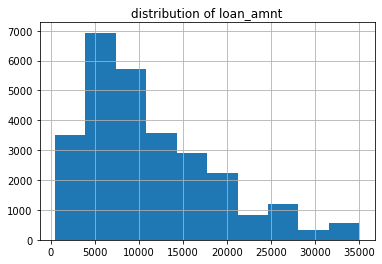

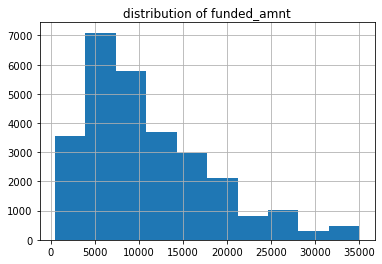

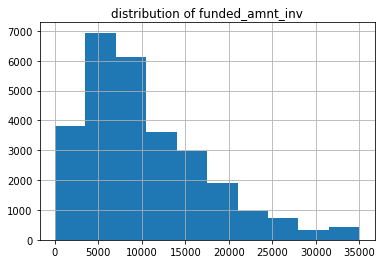

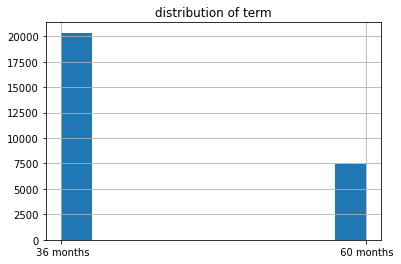

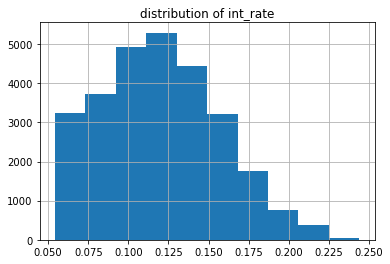

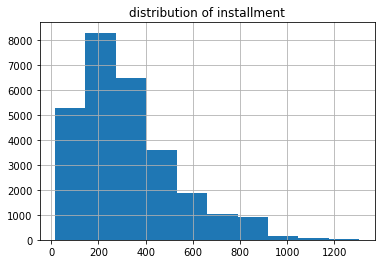

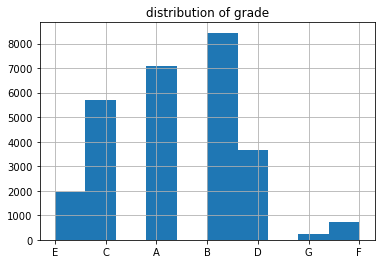

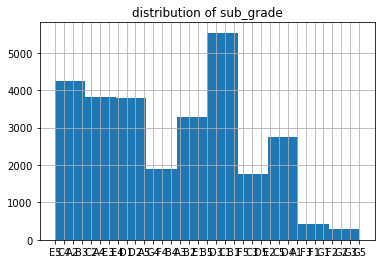

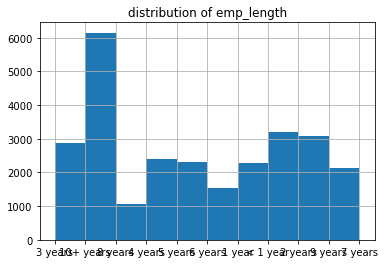

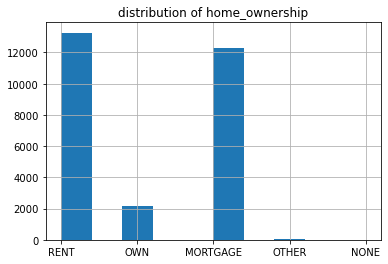

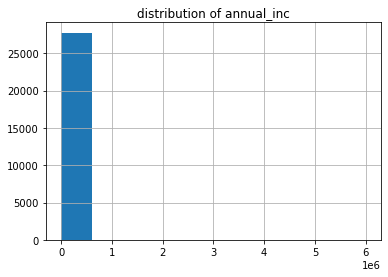

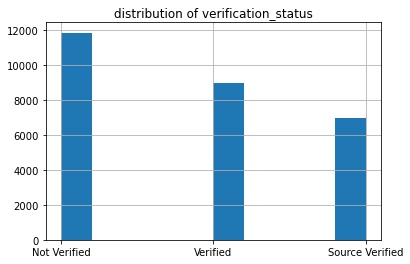

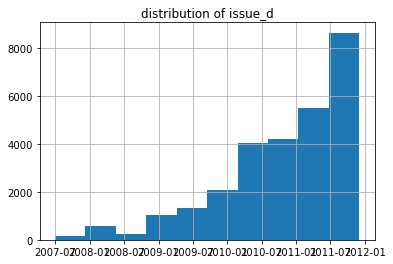

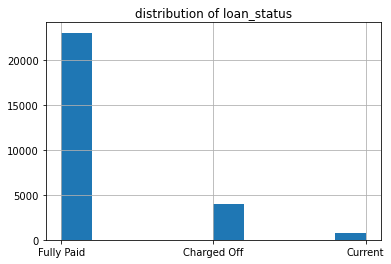

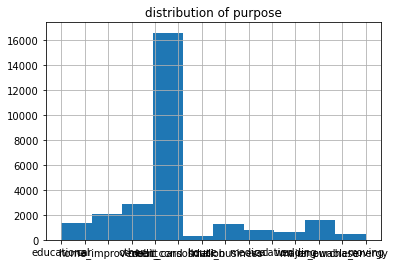

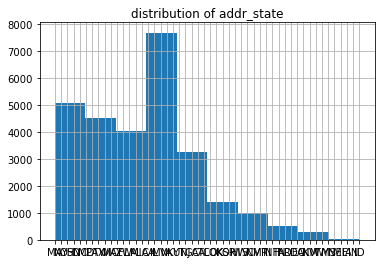

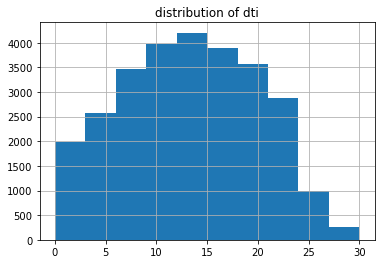

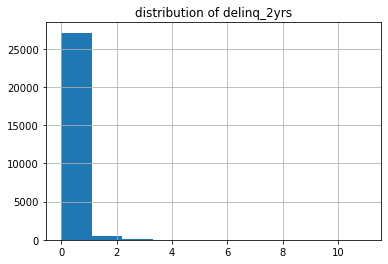

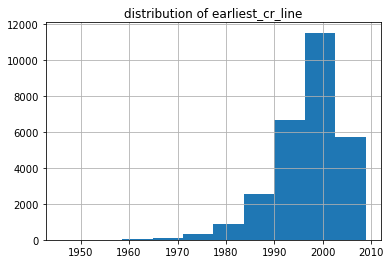

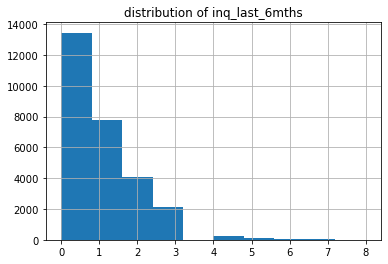

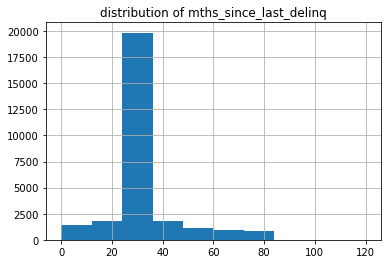

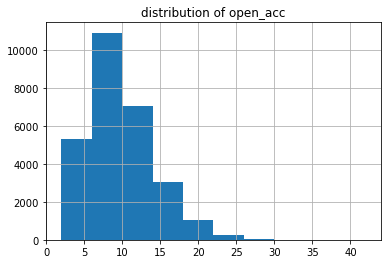

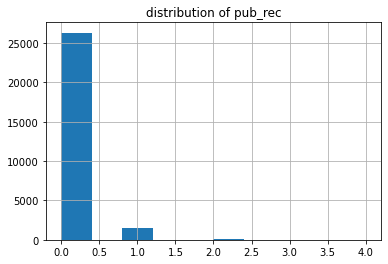

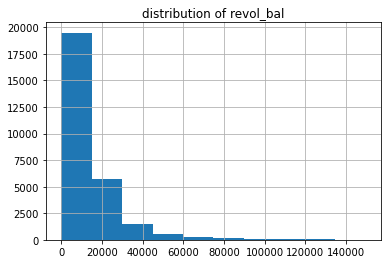

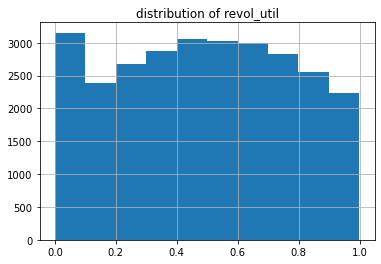

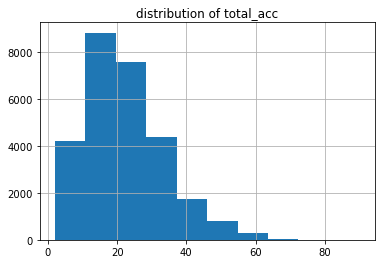

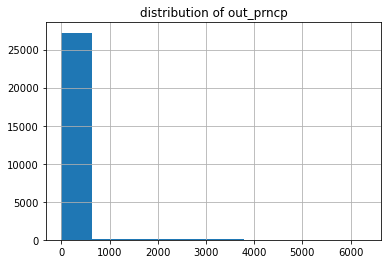

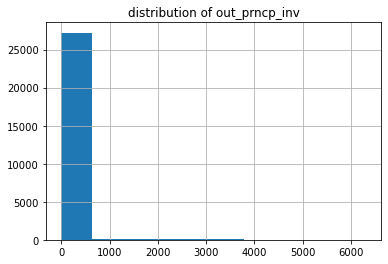

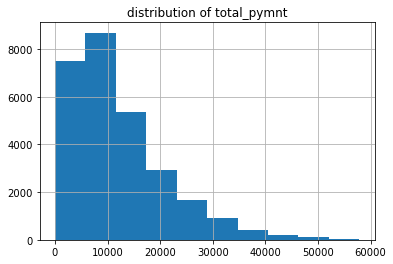

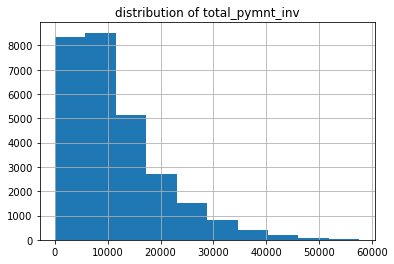

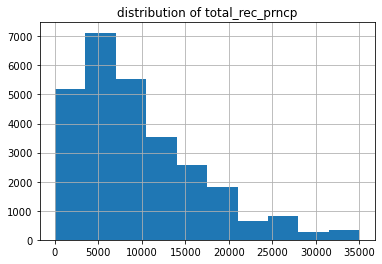

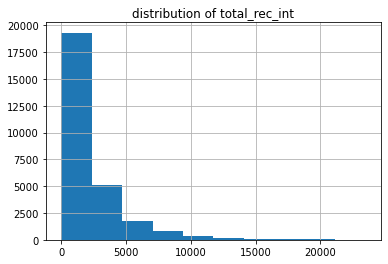

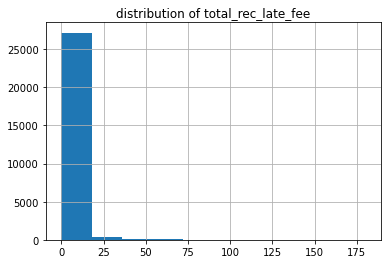

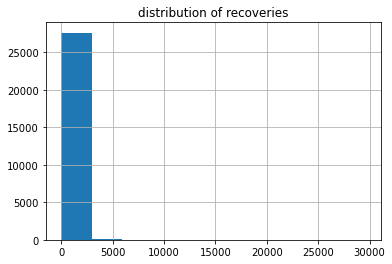

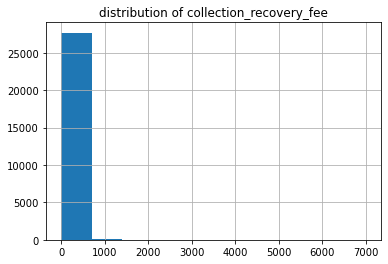

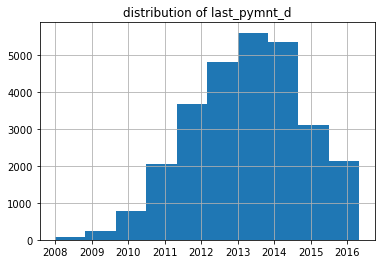

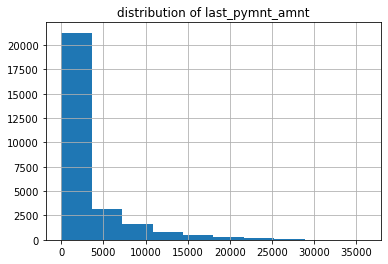

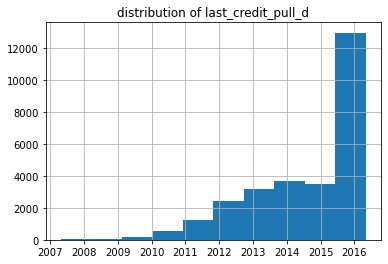

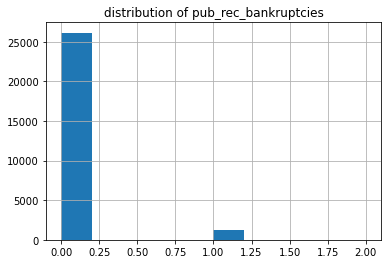

In [29]:
## hist plot for all the columns
for i in [w for w in train_set.columns if w not in ['emp_title','url','desc','zip_code','title']]:
        train_set[i].hist()
        plt.title('distribution of '+i)
        plt.show()
